In [1]:
from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import math
import sympy

from scipy.fftpack import fft #дискретное преобразрвание Фурье 
from scipy.fftpack import ifft #обратное преобразрвание Фурье 

# Задание 1


In [2]:
def f(t, fn):
    return np.cos(fn*t*2.0*np.pi)       #x(t)


def f_with_A(t, fn):
    return A * np.cos(t*2*np.pi*fn)  

In [3]:
A = 2
N=600

f1 = 50
f2 =150
f3 = 450

T1 = 1/f1
T2=1/f2

In [4]:
x0 = np.linspace(0,10,100)

In [5]:
fmax = 1000
T = 1.0/fmax   #  f = 100

In [6]:
T*N

0.6

In [7]:
x=np.linspace(0.0,N*T,N)

In [8]:
xf = np.linspace(0.0,fmax/2,N//2)

In [9]:
fun1 = np.cos(f1*x*2.0*np.pi)  #прописанные фуцнкции на всякий случай 
fun2 = np.cos(f2*x*2.0*np.pi)
fun3 = np.cos(f3*x*2.0*np.pi)

In [10]:
y1 = [f_with_A(t, f1) for t in x0] # сигналы
y2 = [f_with_A(t, f2) for t in x0] 
y3 = [f_with_A(t, f3) for t in x0] 


In [11]:
x1 = np.fft.fftshift(np.fft.fftfreq(x.shape[-1], x[1]-x[0]))

In [12]:
y_fft1 = fft(fun1)  #быстрое преобразование Фурье 
y_fft2 = (fft(fun2))
y_fft3 = (fft(fun3))




# 50 гц

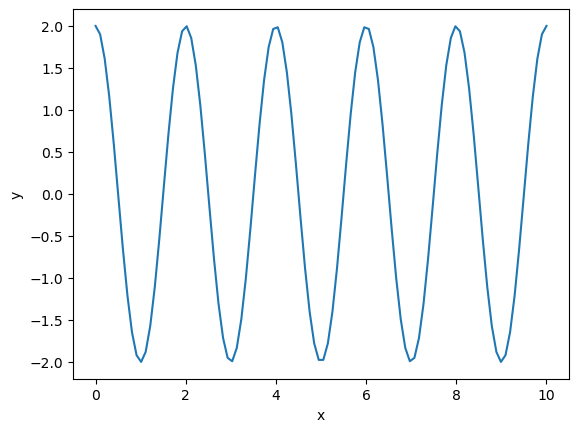

In [13]:
plt.plot(x0, y1)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

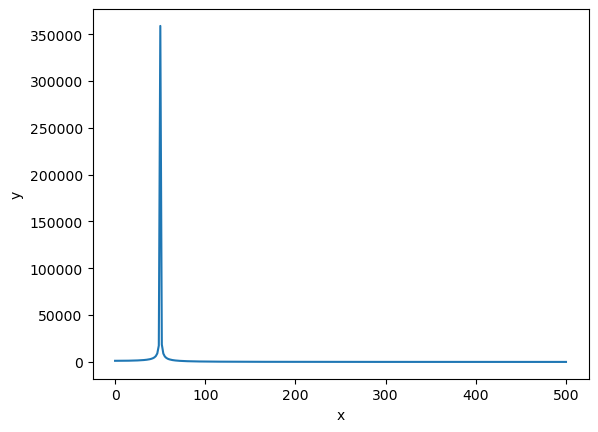

In [14]:
plt.plot(xf, 2.0*N*np.abs(y_fft1[0:N//2]))
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# 150 гц

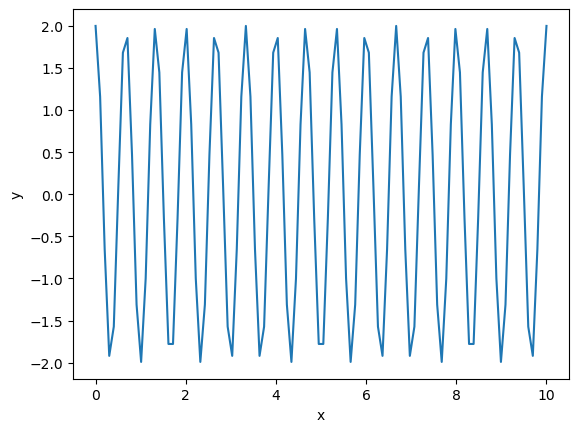

In [15]:
plt.plot(x0, y2)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

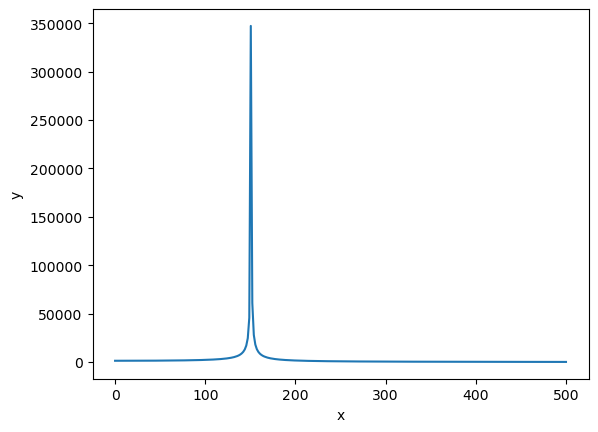

In [16]:
plt.plot(xf, 2.0*N*np.abs(y_fft2[0:N//2]))
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# 450 гц

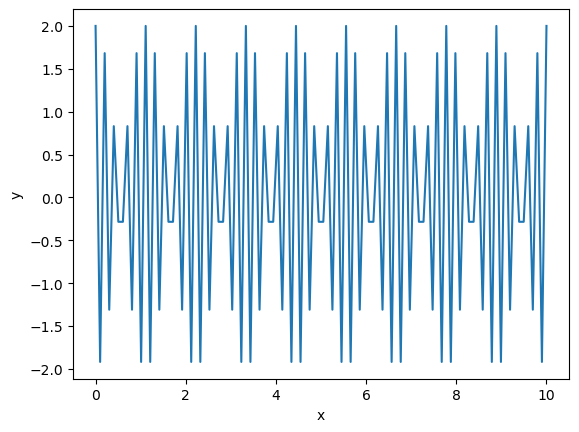

In [17]:
plt.plot(x0, y3)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

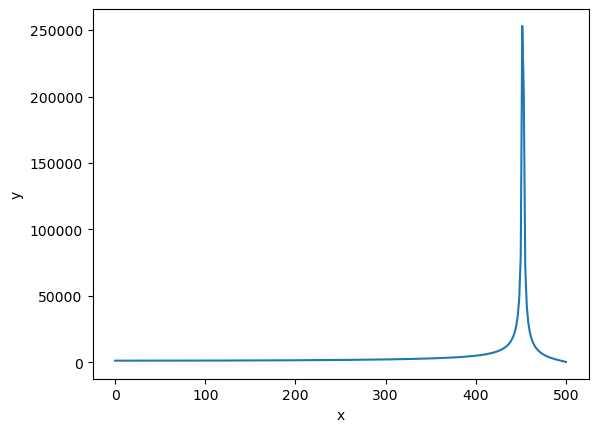

In [18]:
plt.plot(xf, 2.0*N*np.abs(y_fft3[0:N//2]))
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Все спекты на одном графике sum_y

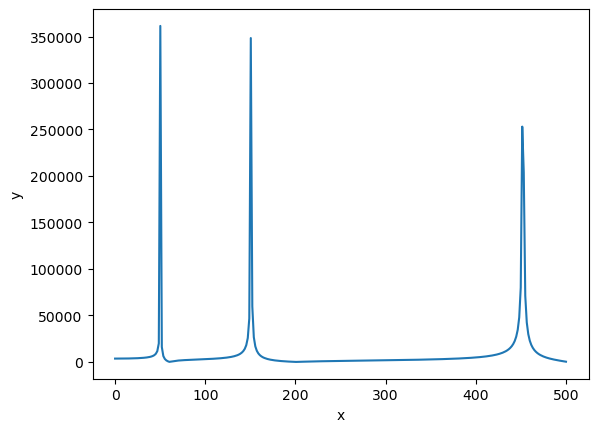

In [19]:
#sum_y = 2.0*N*np.abs(y_fft1[0:N//2])+2.0*N*np.abs(y_fft3[0:N//2])+2.0*N*np.abs(y_fft2[0:N//2])
sum_y = y_fft1+y_fft2+y_fft3

plt.plot(xf, 2.0*N*np.abs(sum_y[0:N//2]))
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Все сигналы на одном графике

In [20]:
c = map(sum, zip(y1,y2, y3))
c = list(c)

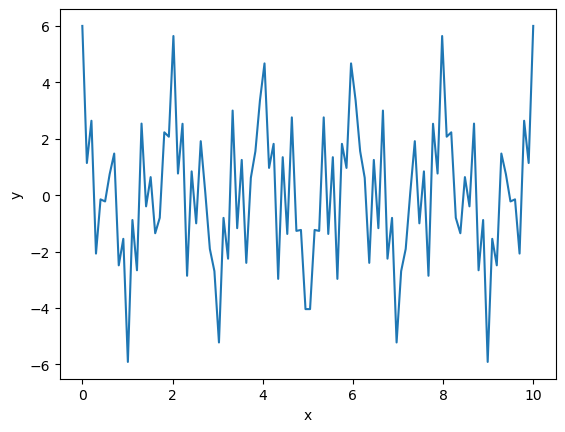

In [21]:
plt.plot(x0, c)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Задание 2   Фильтр нижних частот 


Все фильтры 2-го порядка!!!

In [22]:
f = 70

In [23]:
tw = math.sqrt(2)
tw

1.4142135623730951

In [24]:
comp = np.complex(1j)
comp

C:\Users\79039\AppData\Local\Temp\ipykernel_12004\2109972189.py:1: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  comp = np.complex(1j)


1j

In [25]:
filtr_low = (f**2/(-(xf**2) +comp*tw*f*xf+f**2)) #частотный коэфициент передачи 

In [26]:
sig_filtered =(filtr_low* 2.0*N*np.abs(sum_y[0:N//2]))
len(sum_y)

600

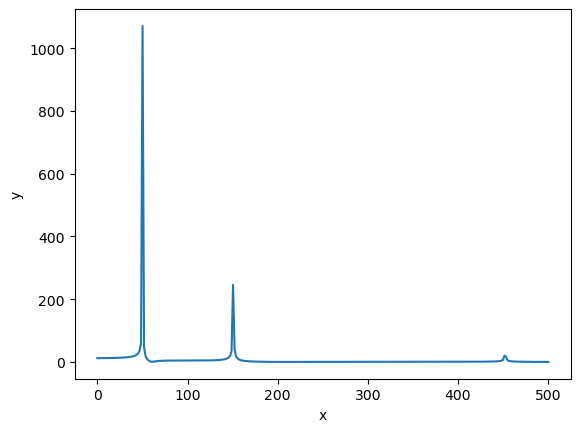

In [27]:
plt.plot(xf,2*np.abs(sig_filtered)/N)
plt.xlabel('x')
plt.ylabel('y')

plt.show()

C:\Users\79039\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


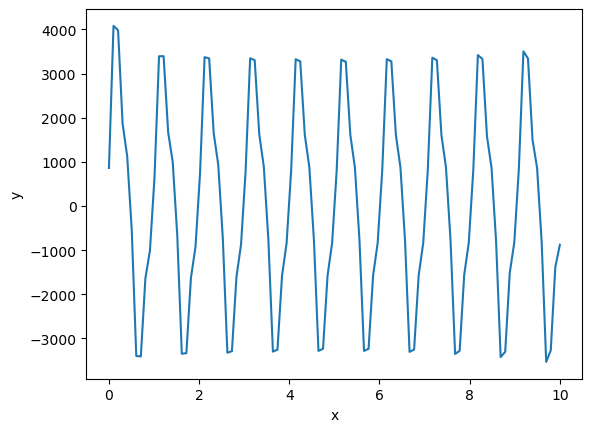

In [28]:
plt.plot(x0,ifft((sig_filtered[::3])))
plt.xlabel('x')
plt.ylabel('y')

plt.show()

# Задание 3 Фильтр высоких частот 

In [29]:
f = 500

In [30]:
filtr_high = (xf**2/(-(f**2) +(1j)*tw*f*xf+xf**2)) #частотный коэфициент передачи 

In [31]:
sig_filtered = (filtr_high* 2.0*N*np.abs(sum_y[0:N//2]))

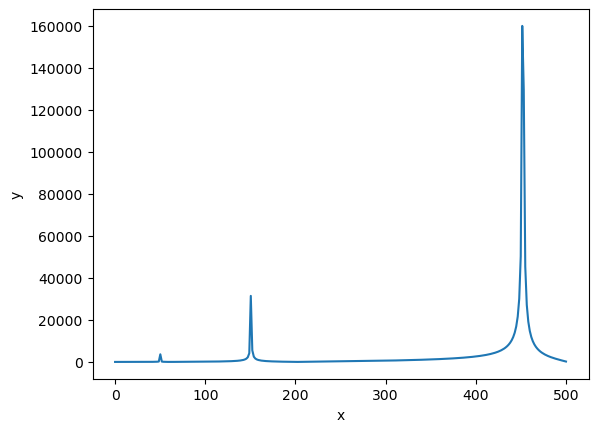

In [32]:
plt.plot(xf,np.abs(sig_filtered))
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Задание 4 Полосовой и заграждающий фильтры

Полосовой фильтр

In [33]:
f = 150

In [34]:
filtr_high = (xf**2/(-(f**2) +(1j)*tw*f*xf+xf**2)) #частотный коэфициент передачи 
filtr_low = (f**2/(-(xf**2) +(1j)*tw*f*xf+f**2)) #частотный коэфициент передачи 

In [35]:
filtr_polos = filtr_high*filtr_low

In [36]:
sig_filtered = (filtr_polos* 2.0*N*np.abs(sum_y[0:N//2]))

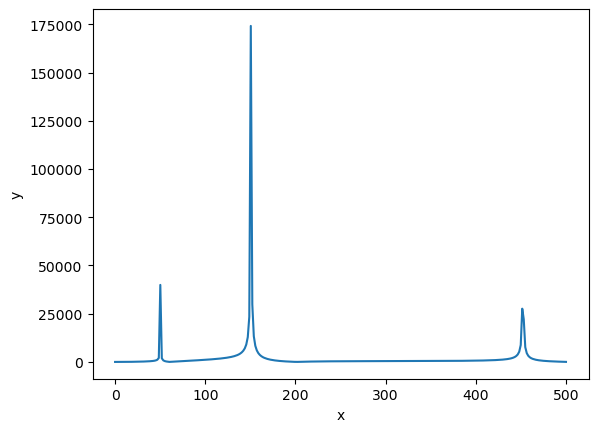

In [37]:
plt.plot(xf,np.abs(sig_filtered))
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Заграждающий фильтр

In [38]:
f =150

In [39]:
filtr_high = (xf**2/(-(f**2) +(1j)*tw*f*xf+xf**2)) #частотный коэфициент передачи 
filtr_low = (f**2/(-(xf**2) +(1j)*tw*f*xf+f**2)) #частотный коэфициент передачи 

In [40]:
filtr_zag = (filtr_high-filtr_low) * (filtr_low-filtr_high)


In [41]:
sig_filtered = (filtr_zag*2.0*N*np.abs(sum_y[0:N//2]))

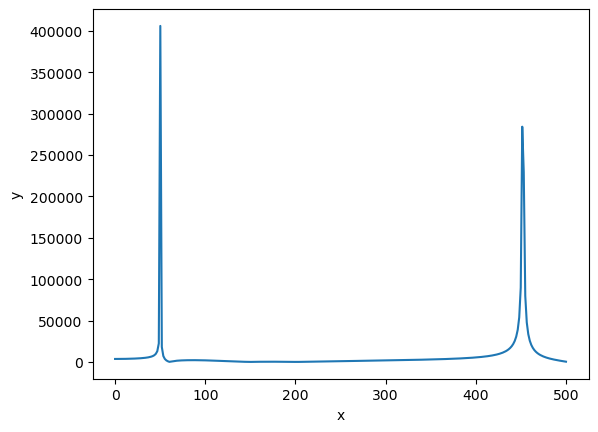

In [42]:
plt.plot(xf,np.abs(sig_filtered))
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Задание 5 Фильтр Баттерворта любого порядка


для фильтров нижних частот!!!

In [47]:
from sympy import * 
def polus(n):
    S1 =  sympy.symbols('S1')
    S2 = solve(Eq(1+((-1)**n)*S1**(2*n),0),S1)
    return S2, len(S2)

In [48]:
n=5  #порядок филтра 
f = 70
S = [x/f for x in xf]


In [49]:
Sn, num =polus(n)
print("Полюсы:",Sn,"\n","Кол-во полюсов: ", num)

Sn_left = Sn[:n] # полюсы в левой полуплоскости 
num2 = len(Sn_left)
print("Полюсы в левой полуплоскости ", Sn_left, "Штук:", len(Sn_left))

Полюсы: [-1, 1, -1/4 + sqrt(5)/4 - I*sqrt(sqrt(5)/8 + 5/8), -1/4 + sqrt(5)/4 + I*sqrt(sqrt(5)/8 + 5/8), 1/4 + sqrt(5)/4 - I*sqrt(5/8 - sqrt(5)/8), 1/4 + sqrt(5)/4 + I*sqrt(5/8 - sqrt(5)/8), -sqrt(5)/4 - 1/4 - I*sqrt(5/8 - sqrt(5)/8), -sqrt(5)/4 - 1/4 + I*sqrt(5/8 - sqrt(5)/8), -sqrt(5)/4 + 1/4 - I*sqrt(sqrt(5)/8 + 5/8), -sqrt(5)/4 + 1/4 + I*sqrt(sqrt(5)/8 + 5/8)] 
 Кол-во полюсов:  10
Полюсы в левой полуплоскости  [-1, 1, -1/4 + sqrt(5)/4 - I*sqrt(sqrt(5)/8 + 5/8), -1/4 + sqrt(5)/4 + I*sqrt(sqrt(5)/8 + 5/8), 1/4 + sqrt(5)/4 - I*sqrt(5/8 - sqrt(5)/8)] Штук: 5


In [55]:
si = 0
m = list()# произведение для знаменателя 

for t in Sn_left:
    hell = []
    for s in S:
        hell.append(s - t) 
    m.append(hell) 
    si=si+1
    
print("Кол-во множителей в знаменателе H:", si)

mult = np.ones(len(S)) 
mult = list(mult)

for t in range(si):
    mult  = [x * y for x, y in zip(mult, m[t])]



Кол-во множителей в знаменателе H: 5


In [52]:
H = [1/(m) for m in mult]  #частотный коэфициент передачи 
H = np.array(H)
len(H)

300

In [244]:
N = 600

In [53]:
len(sum_y)

600

In [245]:
sig_filtered = (H * 2.0*N*np.abs(sum_y[0:N//2]))

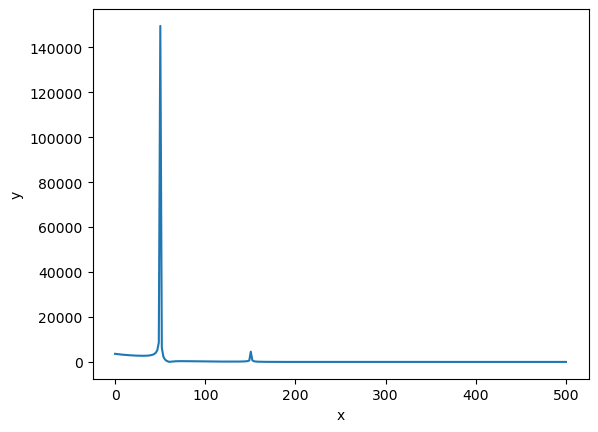

In [246]:
plt.plot(xf,np.abs(sig_filtered))
plt.xlabel('x')
plt.ylabel('y')
plt.show()

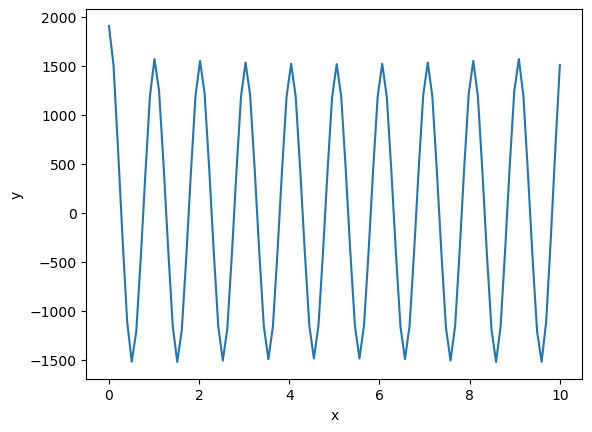

In [247]:
plt.plot(x0,ifft(np.abs(sig_filtered[::3])))
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Задание 6 С шумами (пример с 50 Гц)

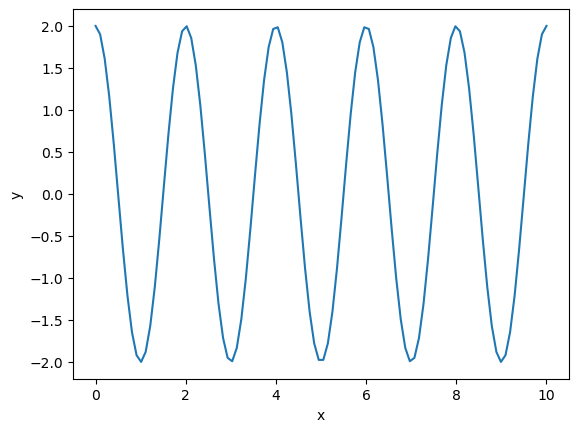

In [228]:
plt.plot(x0, y1) #50 гц
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [229]:
x=np.linspace(0.0,N*T,N)
fun1 = np.cos(f1*x*2.0*np.pi)
y_fft1 = fft(fun1)
len(y_fft1)

600

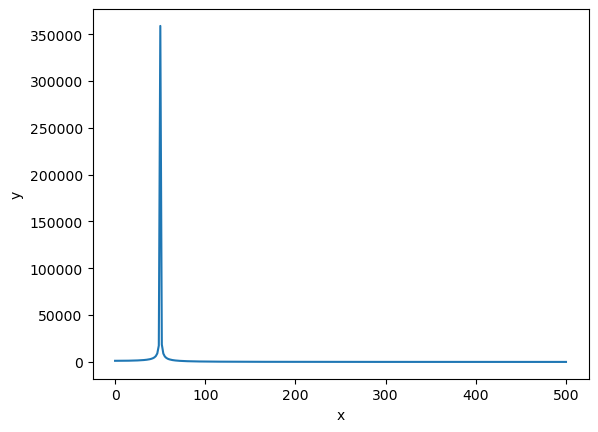

In [230]:
plt.plot(xf, 2.0*N*np.abs(y_fft1[0:N//2]))
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [231]:
noise = np.random.normal(0,1,x.shape) # значения белого шума
(noise.shape)
noise1 = noise[::6]
noise1.shape

(100,)

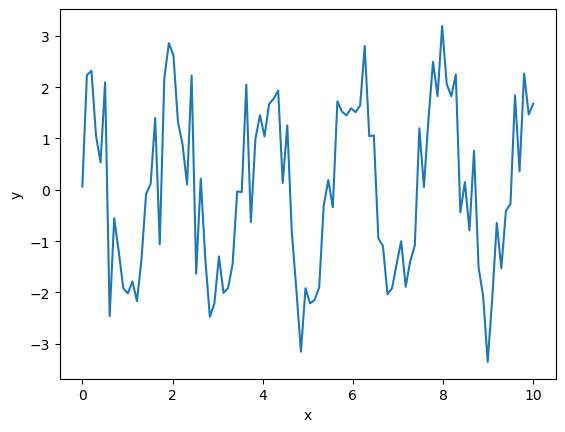

In [232]:
plt.plot(x0, y1+noise1)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [233]:
x=np.linspace(0.0,N*T,N)
fun1 = np.cos(f1*x*2.0*np.pi)+noise
y_fft1 = fft(fun1)
len(y_fft1)

600

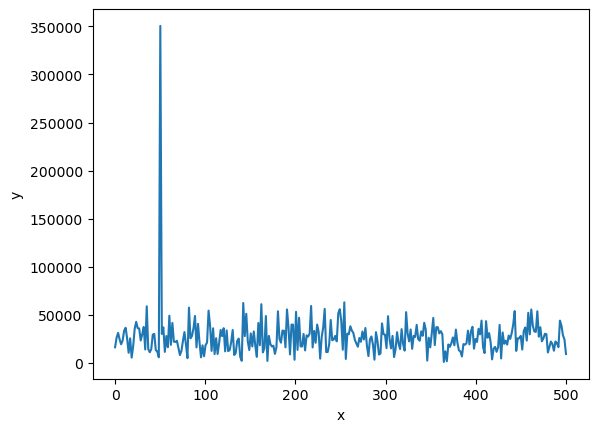

In [234]:
plt.plot(xf,2.0*N*np.abs((y_fft1)[0:N//2]))
plt.xlabel('x')
plt.ylabel('y')

plt.show()

Пусть будет фнч при 50

In [235]:
f =50

In [236]:
filtr_low = (f**2/(-(xf**2) +(1j)*np.sqrt(2)*f*xf+f**2)) #частотный коэфициент передачи 

In [237]:
sig_filtered =(filtr_low* 2.0*N*np.abs((y_fft1)[0:N//2]))


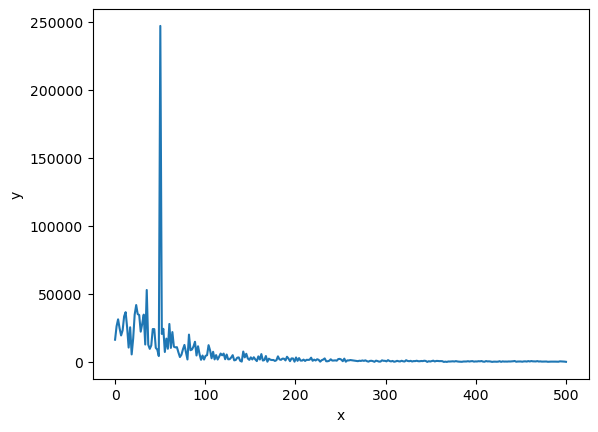

In [238]:
plt.plot(xf,np.abs(sig_filtered))
plt.xlabel('x')
plt.ylabel('y')

plt.show()

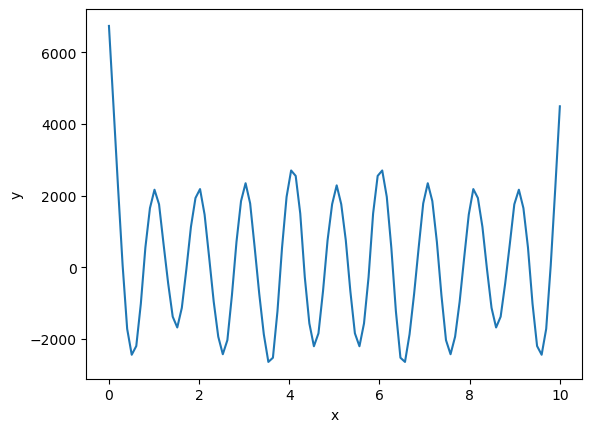

In [239]:
plt.plot(x0,ifft(np.abs(sig_filtered[::3])))
plt.xlabel('x')
plt.ylabel('y')

plt.show()

# Задание 7. Чебышева